In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.datasets import make_classification

In [ ]:

file_path = 'input_file.csv'  # Replace with your actual file path


try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path and ensure the dataset is added to your Kaggle notebook.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully!


In [79]:

df=df.drop(['id'],axis=1)
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

In [80]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (68, 59)
Shape of X_test: (30, 59)
Shape of y_train: (68,)
Shape of y_test: (30,)


--- Class Distribution in Training Data (Counts) ---
Class/ASD
1    43
0    25
Name: count, dtype: int64

--- Class Distribution in Training Data (Percentages) ---
Class/ASD
1    63.235294
0    36.764706
Name: proportion, dtype: float64


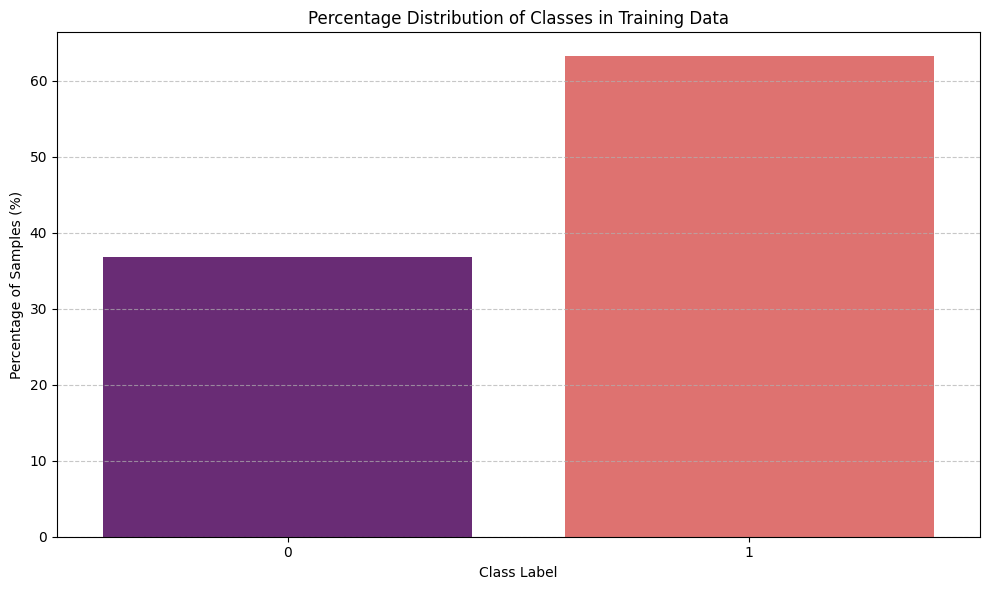

Difference in percentages: 26.47%

--- Class Distribution in Training Data (Counts) AFTER BALANCING ---
y_train_balanced: (50,)
X_train_balanced: (50, 59)

--- Class Distribution in Training Data (Percentages) AFTER BALANCING ---
Class/ASD
0    50.0
1    50.0
Name: proportion, dtype: float64


In [ ]:


y_train = pd.Series(y_train)

print("--- Class Distribution in Training Data (Counts) ---")
class_counts = y_train.value_counts()
print(class_counts)



print("\n--- Class Distribution in Training Data (Percentages) ---")
class_percentages = y_train.value_counts(normalize=True) * 100
print(class_percentages)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_percentages.index, y=class_percentages.values, palette='magma')
plt.title('Percentage Distribution of Classes in Training Data')
plt.xlabel('Class Label')
plt.ylabel('Percentage of Samples (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

majority_class_label = 1
minority_class_label = 0

percentage_difference = abs(class_percentages.loc[majority_class_label] - class_percentages.loc[minority_class_label])
print(f'Difference in percentages: {percentage_difference:.2f}%')

total_samples = len(y_train)
num_samples_to_remove = int(total_samples * (percentage_difference / 100))

majority_class_samples_series = y_train[y_train == majority_class_label]

samples_to_drop_indices = majority_class_samples_series.sample(n=num_samples_to_remove, random_state=42).index


y_train_balanced = y_train.drop(samples_to_drop_indices)

X_train_balanced = X_train.drop(samples_to_drop_indices)



y_train_balanced = y_train.drop(samples_to_drop_indices)
X_train_balanced = X_train.drop(samples_to_drop_indices)


print("\n--- Class Distribution in Training Data (Counts) AFTER BALANCING ---")

print( "y_train_balanced:" , y_train_balanced.shape)
print( "X_train_balanced:", X_train_balanced.shape)


print("\n--- Class Distribution in Training Data (Percentages) AFTER BALANCING ---")
class_percentages_balanced = y_train_balanced.value_counts(normalize=True) * 100
print(class_percentages_balanced)


In [82]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)



--- Starting Hyperparameter Tuning for MLP Classifier ---

--- Hyperparameter Tuning Results for MLP Classifier ---
Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 30), 'max_iter': 500, 'solver': 'lbfgs'}

--- Best MLP Classifier Evaluation ---
Best MLP Classifier Accuracy: 0.8667

Classification Report (Best MLP Classifier):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.89      0.89      0.89        19

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30


Confusion Matrix (Best MLP Classifier):
[[ 9  2]
 [ 2 17]]


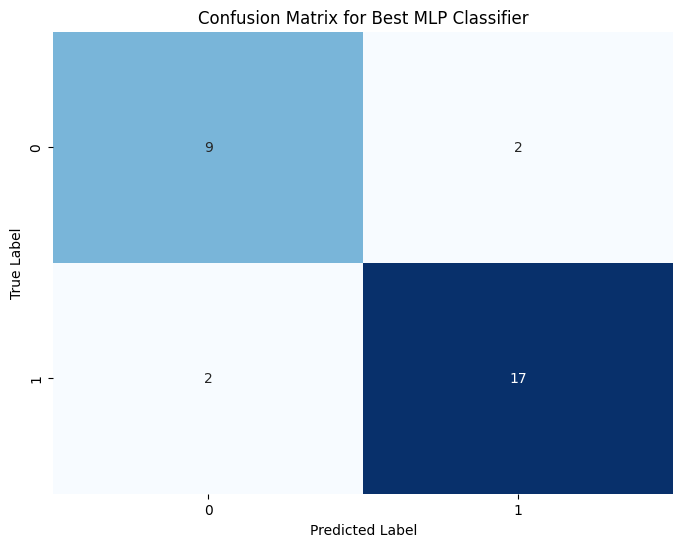


Final Test Accuracy of Best MLP Classifier: 0.8667


In [83]:


def evaluate_classifier(model, X_test, y_test, model_name="Classifier"):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} Evaluation ---")
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))

    print(f"\nConfusion Matrix ({model_name}):")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    return accuracy


print("\n--- Starting Hyperparameter Tuning for MLP Classifier ---")


param_grid_mlp = {
    'hidden_layer_sizes': [(30, 20), (40, 25), (50, 30), (30,), (50,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'], 
    'alpha': [0.0001, 0.001, 0.01], 
    'max_iter': [500, 1000, 1500]
}


grid_search_mlp = GridSearchCV(
    estimator=MLPClassifier(random_state=42, verbose=False),
    param_grid=param_grid_mlp,
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=0
)


grid_search_mlp.fit(X_train_scaled, y_train_balanced)

print("\n--- Hyperparameter Tuning Results for MLP Classifier ---")
print(f"Best parameters found: {grid_search_mlp.best_params_}")



best_mlp_classifier = grid_search_mlp.best_estimator_


test_accuracy_mlp = evaluate_classifier(best_mlp_classifier, X_test_scaled, y_test, "Best MLP Classifier")

print(f"\nFinal Test Accuracy of Best MLP Classifier: {test_accuracy_mlp:.4f}")


--- Starting Hyperparameter Tuning for RBF Classifier ---

--- Hyperparameter Tuning Results ---
Best parameters found: {'C': 10.0, 'gamma': 0.01, 'n_centers': 30}
Best cross-validation accuracy: 0.8400

--- Best RBF Classifier Evaluation ---
Best RBF Classifier Accuracy: 0.9000

Classification Report (Best RBF Classifier):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.94      0.89      0.92        19

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix (Best RBF Classifier):
[[10  1]
 [ 2 17]]


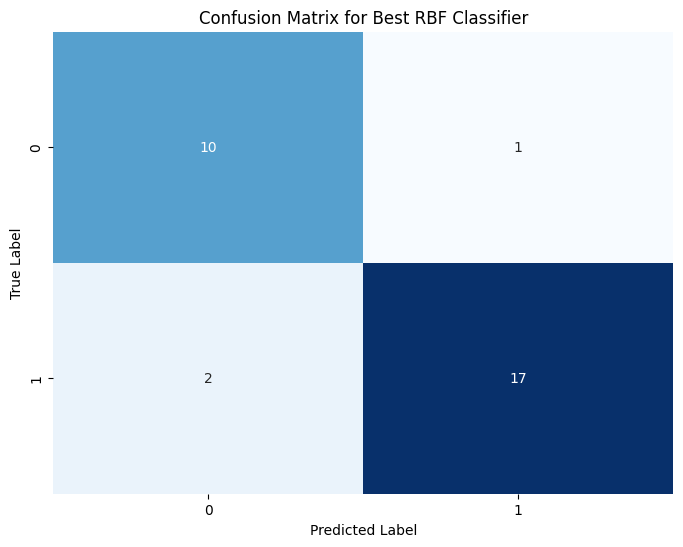


Final Test Accuracy of Best RBF Classifier: 0.9000


In [84]:

class RBFClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_centers=3, gamma=2.0, solver='lbfgs', max_iter=1000, C=1.0):
        self.n_centers = n_centers
        self.gamma = gamma
        self.kmeans = None
        self.linear_model = None
        self.solver = solver
        self.max_iter = max_iter
        self.C = C
    def _transform(self, X):
        distances = self.kmeans.transform(X)
        return np.exp(-self.gamma * distances ** 2)

    def fit(self, X, y):
    
        if self.n_centers > X.shape[0]:
            self.n_centers = X.shape[0]

       
        self.kmeans = MiniBatchKMeans(n_clusters=self.n_centers, random_state=42, n_init='auto')
        self.kmeans.fit(X)
        X_transformed = self._transform(X)

        self.linear_model = LogisticRegression(solver=self.solver, max_iter=self.max_iter, C=self.C, random_state=42)
        self.linear_model.fit(X_transformed, y)
        return self

    def predict(self, X):
        X_transformed = self._transform(X)
        return self.linear_model.predict(X_transformed)

    def predict_proba(self, X):
        X_transformed = self._transform(X)
        return self.linear_model.predict_proba(X_transformed) 
        
def evaluate_classifier(model, X_test, y_test, model_name="Classifier"):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n--- {model_name} Evaluation ---")
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))

    print(f"\nConfusion Matrix ({model_name}):")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    return accuracy


print("\n--- Starting Hyperparameter Tuning for RBF Classifier ---")


param_grid = {
    'n_centers': [5, 10, 20, 30, 50], 
    'gamma': [0.001, 0.01, 0.1, 1.0, 10.0],
    'C': [0.1, 1.0, 10.0, 100.0]
}

grid_search = GridSearchCV(
    estimator=RBFClassifier(solver='lbfgs', max_iter=2000), 
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)


grid_search.fit(X_train_scaled, y_train_balanced)

print("\n--- Hyperparameter Tuning Results ---")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


best_rbf_classifier = grid_search.best_estimator_


test_accuracy = evaluate_classifier(best_rbf_classifier, X_test_scaled, y_test, "Best RBF Classifier")

print(f"\nFinal Test Accuracy of Best RBF Classifier: {test_accuracy:.4f}")